# TP2: Iris flowers

## Import libraries

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F

import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [2]:
iris = load_iris()
x = iris['data']
y = iris['target']

## Visualize

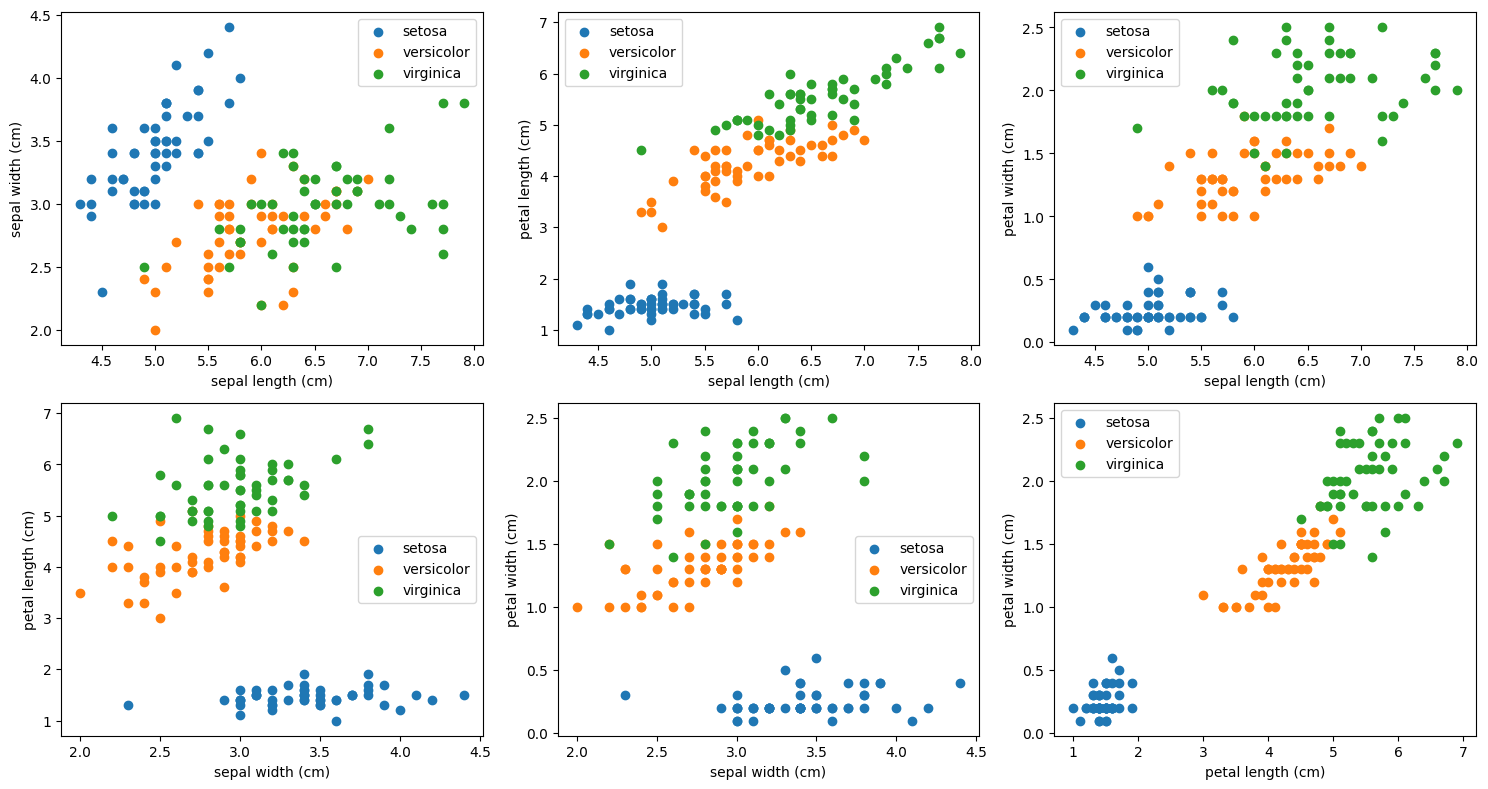

In [3]:
# son 6 graficos porque serian cada par no ordenado de features (4C2 = 6)

categories = iris.target_names
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
k = 0
for i, j in ((i, j) for i in range(3) for j in range(i+1, 4)):
  ax = axes[k // 3, k % 3]
  ax.set_xlabel(iris['feature_names'][i])
  ax.set_ylabel(iris['feature_names'][j])
  for c in range(len(categories)):
    ax.scatter(x[y==c][:,i], x[y==c][:,j], label=categories[c])
  ax.legend()
  k += 1
plt.tight_layout()
plt.show()

## Split the data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Normalize the data

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Convert to torch tensors

In [6]:
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)

# categorias  = 1,2,3...,n
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## Define classifier

In [7]:
class Classifier(nn.Module):

  def __init__(self):
    super(Classifier, self).__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    z = self.linear(x)
    a = F.sigmoid(z)
    return a

## Initialize classifier and train

Last train loss: 0.7715
Last test loss: 0.7594


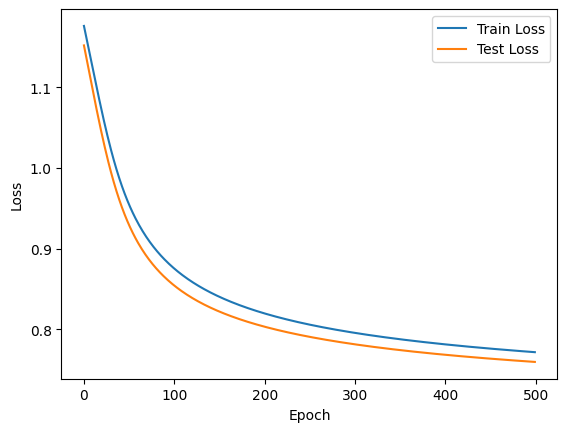

In [8]:
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

losses_train = []
losses_test = []

epochs = 500
for e in range(epochs):
  optimizer.zero_grad()

  predictions = model(x_train_tensor)

  loss_train = criterion(predictions, y_train_tensor)
  losses_train.append(loss_train.item())

  loss_train.backward()

  optimizer.step()

  predictions_tests = model(x_test_tensor)
  loss_test = criterion(predictions_tests, y_test_tensor)
  losses_test.append(loss_test.item())

print(f"Last train loss: {losses_train[-1]:.4f}")
print(f"Last test loss: {losses_test[-1]:.4f}")

plt.plot(losses_train, label='Train Loss')
plt.plot(losses_test, label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

## Test model predictions

In [9]:
with torch.no_grad():
  predictions = model(x_test_tensor)
  predictions_categories = predictions.argmax(dim=1)
  correct_count = torch.sum(predictions_categories == y_test_tensor)

accuracy = correct_count.item() / len(y_test_tensor)
print(f"Accuracy: {accuracy:.4f}")

accuracy_ = accuracy_score(y_test_tensor, predictions_categories)

precision = precision_score(y_test_tensor, predictions_categories, average='weighted')
recall = recall_score(y_test_tensor, predictions_categories, average='weighted')

# f1_score = 2 * recall * precision / (recall + precision)
f1score = 2 * (recall * precision / (recall + precision))
f1score_ = f1_score(y_test_tensor, predictions_categories, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1score:.4f}")

# From sklearn.metrics
print(f"Accuracy_: {accuracy_:.4f}")
print(f"F1-score_: {f1score_:.4f}")


Accuracy: 0.9000
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1-score: 0.9007
Accuracy_: 0.9000
F1-score_: 0.8992


## Visualize model predictions

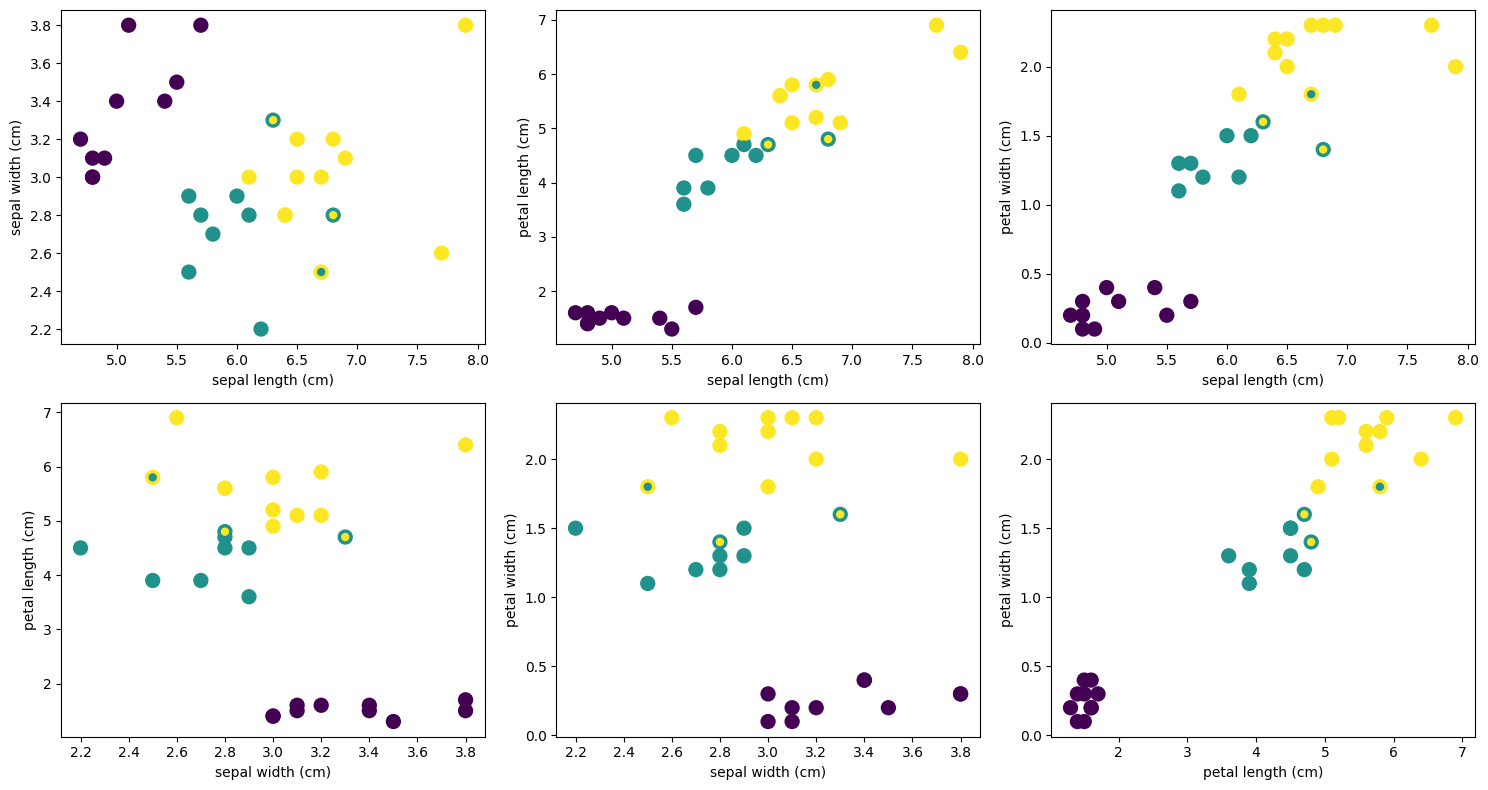

In [10]:
# son 6 graficos porque serian cada par no ordenado de features (4C2 = 6)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
k = 0
for i, j in ((i, j) for i in range(3) for j in range(i+1, 4)):
  ax = axes[k // 3, k % 3]
  ax.scatter(x_test[:,i], x_test[:,j], c=y_test, s=100) # true labels
  ax.scatter(x_test[:,i], x_test[:,j], c=predictions_categories, s=25) # predictions
  ax.set(xlabel=iris['feature_names'][i], ylabel=iris['feature_names'][j])
  k += 1
plt.tight_layout()
plt.show()

# TODOs:
1. Add tanh.
2. Add softmax and change the loss for NLLL.
3. Compute Precision, Recall, and F1.

Nota: Se agrega "_2" en las variables nuevas para no pisar nada, comparar el modelo y graficos anteriores.

In [11]:
# Set up identico a la practica

# split data
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.2, random_state=42)

# normalize data
scaler2 = StandardScaler()
x_train_scaled_2 = scaler2.fit_transform(x_train_2)
x_test_scaled_2 = scaler2.transform(x_test_2)

# convert to torch tensors

x_train_tensor_2 = torch.tensor(x_train_scaled_2, dtype=torch.float32)
x_test_tensor_2 = torch.tensor(x_test_scaled_2, dtype=torch.float32)
y_train_tensor_2 = torch.tensor(y_train_2, dtype=torch.long)
y_test_tensor_2 = torch.tensor(y_test_2, dtype=torch.long)


In [12]:
# 1) Add tanh:


# Model dim
# len(inputs) = len(iris['feature_names']) = 4
# len(outputs) = len(categories) = len(iris.target_names) = 3

logSoftmax = nn.LogSoftmax(dim=1)

# Define classifier with tanh
class ClassifierTanh(nn.Module):

  def __init__(self):
    super(ClassifierTanh, self).__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    z = self.linear(x)
    a = F.tanh(z)
    # Softmax layer (use "LogSoftmax" instead of "softmax" because of numerical stability)
    s = logSoftmax(a)
    return s

Last train loss: 0.4739
Last test loss: 0.4568


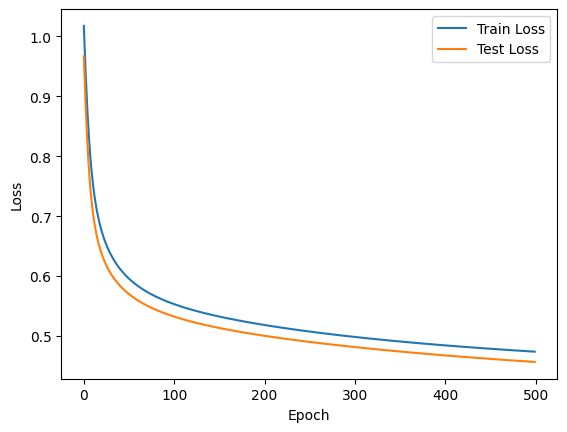

In [13]:
# Init classifier and train

model_2 = ClassifierTanh()
criterion_2 = nn.NLLLoss()
optimizer_2 = optim.SGD(model_2.parameters(), lr=0.1)

losses_train_2 = []
losses_test_2 = []


epochs_2 = 500
for e in range(epochs_2):
  optimizer_2.zero_grad()

  predictions_2 = model_2(x_train_tensor_2)

  loss_train_2 = criterion_2(predictions_2, y_train_tensor_2)

  losses_train_2.append(loss_train_2.item())

  loss_train_2.backward()

  optimizer_2.step()

  # Validate
  predictions_tests_2 = model_2(x_test_tensor_2)
  loss_test_2 = criterion_2(predictions_tests_2, y_test_tensor_2)
  losses_test_2.append(loss_test_2.item())


print(f"Last train loss: {losses_train_2[-1]:.4f}")
print(f"Last test loss: {losses_test_2[-1]:.4f}")

plt.plot(losses_train_2, label='Train Loss')
plt.plot(losses_test_2, label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Average strategy

(ejemplos con F1 = F1_score)

## Micro

Use micro-averaging score when there is a need to weight each instance or prediction equally.

Sum statistics over all labels. Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP):

```
TP / (
  TP + ((1/2) * (FP + FN))
)
```


micro-F1 = accuracy = micro-precision = micro-recall


## Macro

Use macro-averaging score when all classes need to be treated equally to evaluate the overall performance of the classifier with regard to the most frequent class labels.

Calculates statistics for each label and computes weighted average using their support:
```
  con N classes =>
    (F1_class1 + ... + F1_classN) / n
```

## Weighted
Use weighted macro-averaging score in case of class imbalances (different number of instances related to different class labels). The weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average.

Calculates statistics for each label and computes weighted average using their support (support = samples):

```
  F1_class1 * sum(class1_support) / sum(total_support)
  +
    ...
  +
  F1_classN * sum(classN_support) / sum(total_support)
```

-------------------
More info: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

In [14]:
## Test model predictions

with torch.no_grad():
  predictions_2 = model_2(x_test_tensor_2)
  predictions_categories_2 = predictions_2.argmax(dim=1)
  # len(TP + TN)
  correct_count_2 = torch.sum(predictions_categories_2 == y_test_tensor_2)

accuracy_2 = correct_count_2.item() / len(y_test_tensor_2)
accuracy_2_ = accuracy_score(y_test_tensor_2, predictions_categories_2)

# average strategy:
#   - micro: Sum statistics over all labels
#   - macro: Calculate statistics for each label and average them
#   - weighted: calculates statistics for each label and computes weighted average using their support
average_strategy = 'micro'

precision_2 = precision_score(y_test_tensor_2, predictions_categories_2, average=average_strategy)
recall_2 = recall_score(y_test_tensor_2, predictions_categories_2, average=average_strategy)

# f1 = 2 * recall * precision / (recall + precision)
f1_2 = f1_score(y_test_tensor_2, predictions_categories_2, average=average_strategy)

print(f"Accuracy: {accuracy_2:.6f}")
print(f"Precision: {precision_2:.6f}")
print(f"Recall: {recall_2:.6f}")
print(f"F1-score: {f1_2:.6f}")

# From sklearn.metrics
print(f"Accuracy_: {accuracy_2_:.6f}")


# classification_report
print("classification report:")
print(f"\n {classification_report(y_test_tensor_2, predictions_categories_2)}")

Accuracy: 0.933333
Precision: 0.933333
Recall: 0.933333
F1-score: 0.933333
Accuracy_: 0.933333
classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



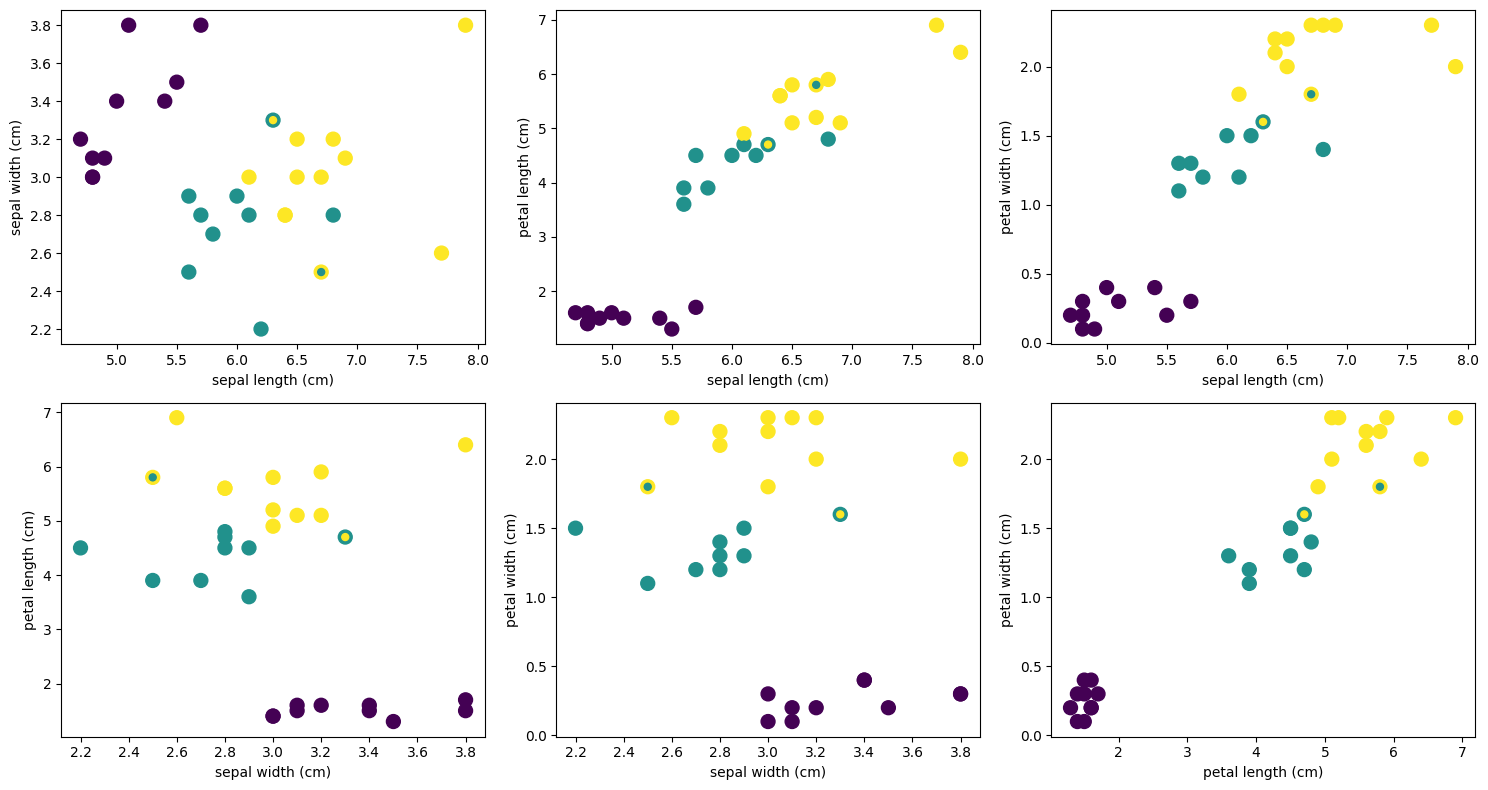

In [15]:
# Visualize model predictions

# son 6 graficos porque serian cada par no ordenado de features (4C2 = 6)

fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
k = 0
for i, j in ((i, j) for i in range(3) for j in range(i+1, 4)):
  ax2 = axes2[k // 3, k % 3]
  ax2.scatter(x_test_2[:,i], x_test_2[:,j], c=y_test_2, s=100) # true labels
  ax2.scatter(x_test_2[:,i], x_test_2[:,j], c=predictions_categories_2, s=25) # predictions
  ax2.set(xlabel=iris['feature_names'][i], ylabel=iris['feature_names'][j])
  k += 1
plt.tight_layout()
plt.show()

# Task list

- [X] Add tanh
- [X] Add softmax and change the loss for NLLL
(validate if works)
- [X] Compute precision, recall and F1